# Image Pyramids

An “image pyramid” is a multi-scale representation of an image.

Utilizing an image pyramid allows us to find objects in images at different scales of an image. 

At the bottom of the pyramid we have the original image at its original size (in terms of width and height). And at each subsequent layer, the image is resized (subsampled) and optionally smoothed (usually via Gaussian blurring).

The image is progressively subsampled until some stopping criterion is met, which is normally a minimum size has been reached and no further subsampling needs to take place.



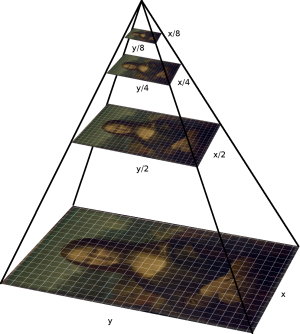

## Types of Image Pyramids 

There are two kinds of Image Pyramids.<br><b>
*1) Gaussian Pyramid   and   2) Laplacian Pyramids*

### 1) Gaussian Pyramids

***Higher level (Low resolution) in a Gaussian Pyramid*** is formed by removing consecutive rows and columns in Lower level (higher resolution) image. Then each pixel in higher level is formed by the contribution from 5 pixels in underlying level with gaussian weights. By doing so, a **M×N image becomes M/2×N/2 image**. So area reduces to one-fourth of original area. It is called an Octave. The same pattern continues as we go upper in pyramid (ie, resolution decreases). Similarly while expanding, area becomes 4 times in each level. We can find Gaussian pyramids using <b>cv2.pyrDown() and cv2.pyrUp() functions.

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [115]:
img=cv2.imread('assets/bigwall.jpg',0)
img.shape

(2048, 1536)

#### Notice that on each pass of cv2.pyrDown() we see the image sized is halfed.


(1024, 768)


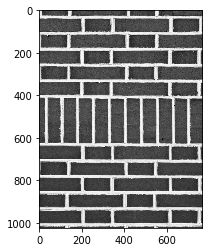

(512, 384)


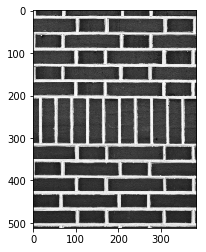

(256, 192)


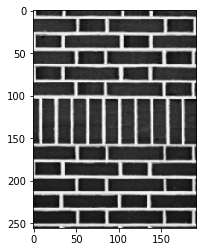

In [116]:
lower_reso = cv2.pyrDown(img)
print(lower_reso.shape)
plt.imshow(lower_reso,cmap='gray')
plt.show()

lower_reso=cv2.pyrDown(lower_reso)
print(lower_reso.shape)
plt.imshow(lower_reso,cmap='gray')
plt.show()

lower_reso=cv2.pyrDown(lower_reso)
print(lower_reso.shape)
plt.imshow(lower_reso,cmap='gray')
plt.show()

#### Here we go from lower level to higher level and the size doubles on each pass.But note that the image data lost during the shrink cannot be  retained.Hence the final high_rez image is not the same as the original image.

(512, 384)


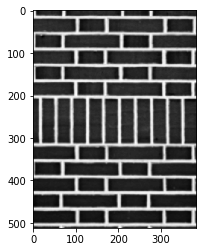

(1024, 768)


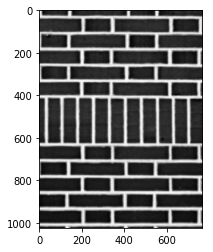

(2048, 1536)


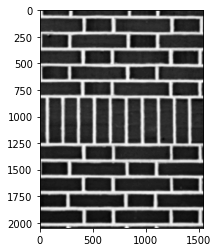

In [117]:
higher_rez=cv2.pyrUp(lower_reso)
print(higher_rez.shape)
plt.imshow(higher_rez,cmap='gray')
plt.show()


higher_rez=cv2.pyrUp(higher_rez)
print(higher_rez.shape)
plt.imshow(higher_rez,cmap='gray')
plt.show()


higher_rez=cv2.pyrUp(higher_rez)
print(higher_rez.shape)
plt.imshow(higher_rez,cmap='gray')
plt.show()

### Laplacian Pyramids
   Laplacian Pyramids are formed from the Gaussian Pyramids. There is no exclusive function for that. Laplacian pyramid images are like edge images only. Most of its elements are zeros. They are used in image compression. *A level in Laplacian Pyramid is formed by the difference between that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid.*

In [118]:
#Let us have 3 levels to out pyramid
lev=5
#duplicate img
ig=img
gauss_pyr=[]
#constructing thr gaussian pyramid.Remeber higher the level lower the resolution
for i in range(lev):
    gauss_pyr.append(ig)
    ig=cv2.pyrDown(ig)


(128, 96)


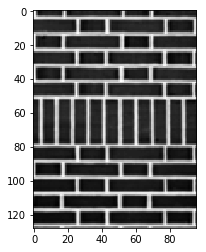

(256, 192)


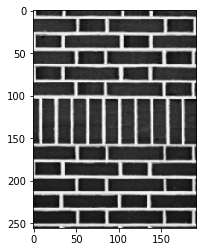

(512, 384)


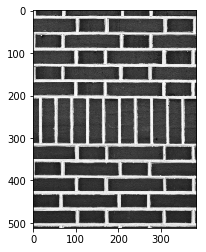

(1024, 768)


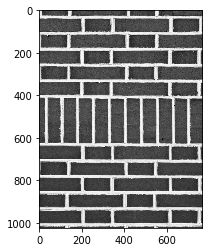

(2048, 1536)


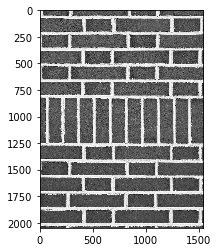

In [119]:
#Printing the gaussian pyramid from top to bottom
for i in range(lev-1,-1,-1):
    print(gauss_pyr[i].shape)
    plt.imshow(gauss_pyr[i],cmap='gray')
    plt.show()

### We know : "A level in Laplacian Pyramid is formed by the difference between that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid.", hence:

In [120]:
#If gaussian pyramid has n levels the laplacian will hace n-1 levels
laplacian=[]
for i in range(lev-1,0,-1):
    laplacian.append(cv2.subtract(gauss_pyr[i-1],cv2.pyrUp(gauss_pyr[i])))


### Laplacian Pyramid

(256, 192)


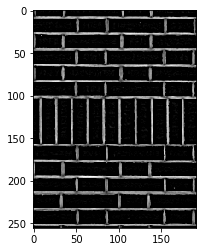

(512, 384)


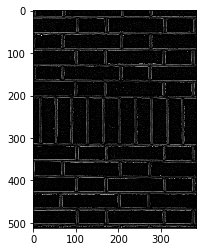

(1024, 768)


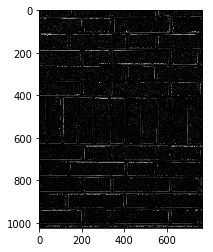

(2048, 1536)


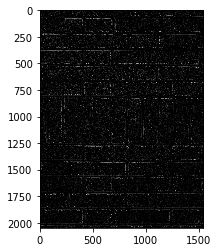

In [121]:
for i in range(lev-1):
    print(laplacian[i].shape)
    plt.imshow(laplacian[i],cmap='gray')
    plt.show()

## Image Blending using Pyramids


One application of Pyramids is Image Blending. For example, in image stitching, you will need to stack two images together, but it may not look good due to discontinuities between images. In that case, image blending with Pyramids gives you seamless blending without leaving much data in the images.

### Steps Involved

* Load the two images.
* Find the Gaussian Pyramids for both the images.
* From Gaussian Pyramids, find their Laplacian Pyramids
* Now join the left half of image1 and right half of image2 in each levels of Laplacian Pyramids
* Finally from this joint image pyramids, reconstruct the original image.

### Step 1: Load Images

(512, 512)


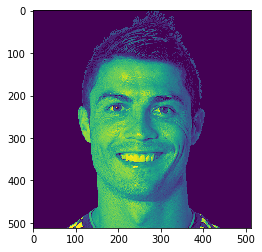

(512, 512)


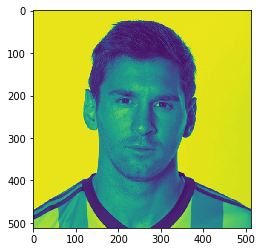

In [128]:

img1=cv2.imread('assets/cr7.png',0)
print(img1.shape)
plt.imshow(img1)
plt.show()

img2=cv2.imread('assets/messi.png',0)
print(img1.shape)
plt.imshow(img2)
plt.show()

### Step 2: Find the Gaussian Pyramids for both the images.

In [129]:
#Creating copies to preserve originals
p1=img1
p2=img2

In [130]:
#Let the pyramids have 5 levels
lev=5

#Generating Gaussian Pyramids for both the images
gauss1=[]
gauss2=[]

#constructing thr gaussian pyramid.Remeber higher the level lower the resolution

#Person 1
for i in range(lev):
    gauss1.append(p1)
    p1=cv2.pyrDown(p1)

#Person 2
for i in range(lev):
    gauss2.append(p2)
    p2=cv2.pyrDown(p2)



(32, 32)


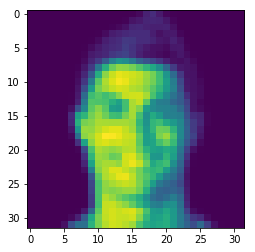

(32, 32)


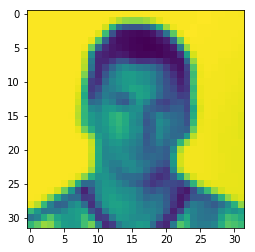

(64, 64)


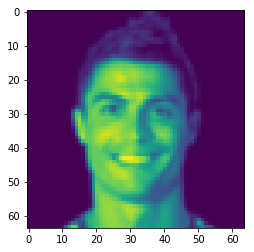

(64, 64)


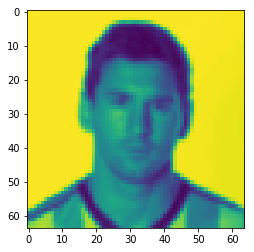

(128, 128)


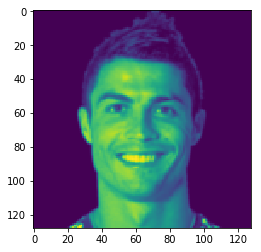

(128, 128)


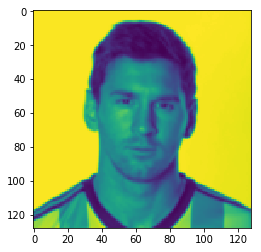

(256, 256)


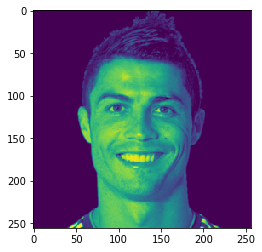

(256, 256)


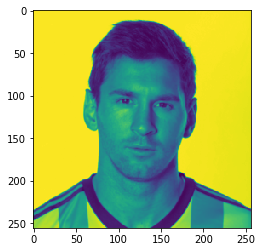

(512, 512)


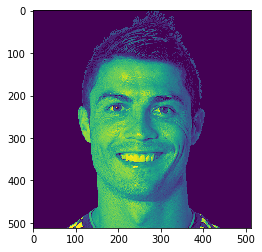

(512, 512)


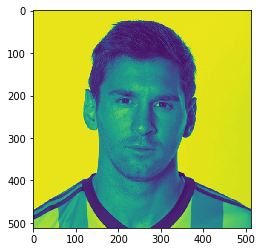

In [131]:
#Printing the gaussian pyramid from top to bottom
for i in range(lev-1,-1,-1):
    print(gauss1[i].shape)
    plt.imshow(gauss1[i])
    plt.show()
    print(gauss2[i].shape)
    plt.imshow(gauss2[i])
    plt.show()

### Step3 : From Gaussian Pyramids, find their Laplacian Pyramids


In [132]:
#Now we generate the laplacian pyramids using the gaussian pyramids from above
lap1=[]
lap2=[]


In [133]:
#Generating 2 new laplacian pyramids one each for the 2 input images
for i in range(lev-1,0,-1):
    lap1.append(cv2.subtract(gauss1[i-1],cv2.pyrUp(gauss1[i])))
for i in range(lev-1,0,-1):
    lap2.append(cv2.subtract(gauss2[i-1],cv2.pyrUp(gauss2[i])))


(64, 64)


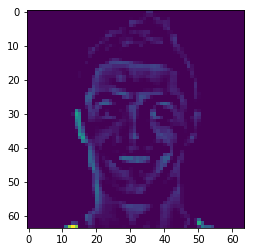

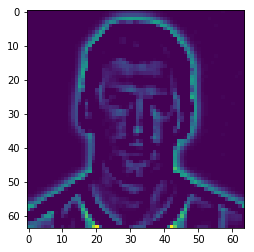

(128, 128)


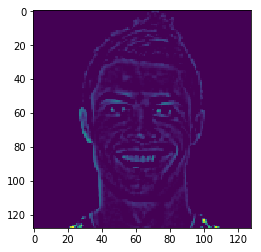

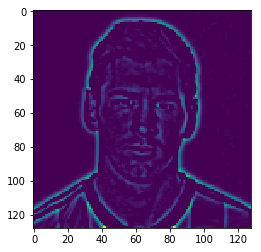

(256, 256)


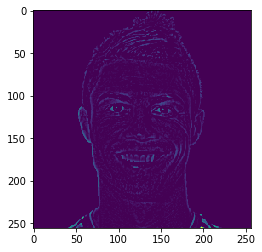

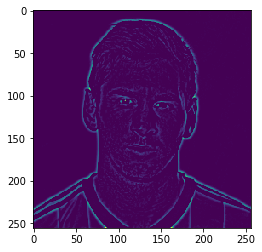

(512, 512)


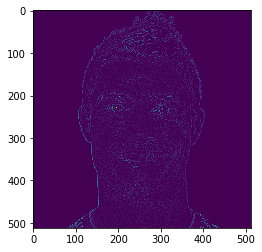

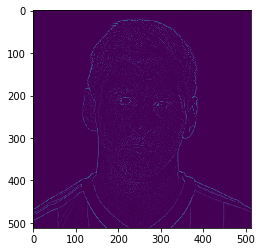

In [134]:
#Displaying the laplacian pyramid
for i in range(lev-1):
    print(lap1[i].shape)
    plt.imshow(lap1[i])
    plt.show()
    plt.imshow(lap2[i])
    plt.show()

### Step 4 :Now join the left half of image1 and right half of image2 in each levels of Laplacian Pyramids


In [138]:
#We are going to join the 2 halves and store then in a new list called lap_res
lap_res=[]
for l1,l2 in zip(lap1,lap2):
    rows,col=l1.shape
    #Stack arrays in sequence horizontally (column wise).
    x=np.hstack((l1[:,:int(col/2)],l2[:,int(col/2):]))
    lap_res.append(x)
len(lap_res)

4

### Step 5: Finally from this joint image pyramids, reconstruct the original image.

(64, 64)


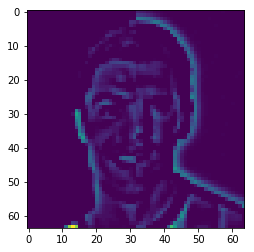

In [139]:
#We take the top of the merged laplacian pyramid and reconstuct our final reconstruction
merged=lap_res[0]
print(merged.shape)
plt.imshow(merged)   
plt.show()

(128, 128)


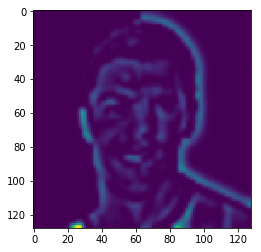

(256, 256)


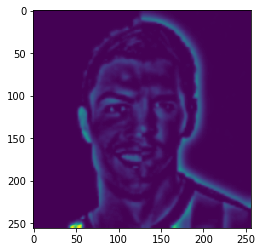

(512, 512)


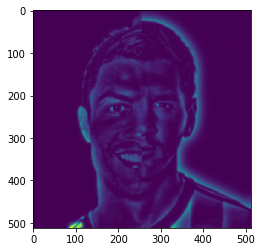

In [140]:
#Reconstructing
for i in range(1,lev-1):
    merged=cv2.pyrUp(merged)
    print(merged.shape)
    plt.imshow(merged)
    plt.show()
    merged=cv2.add(merged,lap_res[i])


# END